# Predicting a winner with machine learning models
#### Cricket is one of the most popular sports in the world today. It is a very difficult game to decide a winner till the last over. It is very difficult to reach a final decision in fast-paced match patterns like IPL. Therefore, machine learning methods are used to determine the winner using information such as previous wins of the teams, city and venue. In this machine learning research we decide to use Logistic Regression, Random Forest and Ada boost models. The most accurate format is used to determine the final winner.


In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer

In [3]:
# import dataset
df = pd.read_csv('matches.csv')
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### The first step is to import the dataset.It has id,season,city,date, team 1, team 2, toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2 and umpire 3 variables. It has 756 rows with 18 columns

# Data Cleaning

In [6]:
# check missing values
missing_values = df.isnull().sum()
missing_values

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
# Remove a umpire3 column
df = df.drop('umpire3', axis=1)


In [8]:
df['winner'].fillna(df['winner'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['player_of_match'].fillna(df['player_of_match'].mode()[0], inplace=True)
df['umpire1'].fillna(df['umpire1'].mode()[0], inplace=True)
df['umpire2'].fillna(df['umpire2'].mode()[0], inplace=True)                             
                              

In [9]:
df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


In [10]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

### Here, the missing value is checked first. The city variable has 7 missing values. Winner and match_player have 4 missing values. There are 2 missing values ​​in umpire1 and umpire2 and 637 missing values ​​in the umpire3 variable. Because umpire3 has lost more data, we have to drop that variable. For other missing value variables, its mode value is filled in.

# Data Analysis

In [20]:
df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [22]:
# Replace Rising pune Supergiant to Rising Pune supergiants
df['winner'] = df['winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['toss_winner'] = df['toss_winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['team1'] = df['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['team2'] = df['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')


In [24]:
df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Delhi Capitals'], dtype=object)

In [26]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [28]:
 #manual encoding
class ManualEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mapping = {
            'team1': {'MI':1,'KKR':2,'RCB':3,'DCC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DC':14},
            'team2': {'MI':1,'KKR':2,'RCB':3,'DCC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DC':14},
            'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DCC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DC':14},
            'winner': {'MI':1,'KKR':2,'RCB':3,'DCC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DC':14}
        }
        self.replacement_dict = {
            'Mumbai Indians': 'MI',
            'Kolkata Knight Riders': 'KKR',
            'Royal Challengers Bangalore': 'RCB',
            'Deccan Chargers': 'DCC',
            'Chennai Super Kings': 'CSK',
            'Rajasthan Royals': 'RR',
            'Delhi Daredevils': 'DD',
            'Gujarat Lions': 'GL',
            'Kings XI Punjab': 'KXIP',
            'Sunrisers Hyderabad': 'SRH',
            'Rising Pune Supergiant': 'RPS',
            'Kochi Tuskers Kerala': 'KTK',
            'Pune Warriors': 'PW',
            'Delhi Capitals': 'DC'
        }
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.replace(self.replacement_dict)  
        X = X.replace(self.mapping)           
        return X


In [30]:
categorical_features1 = ['team1','team2','toss_winner','winner']
categorical_transformer1 = Pipeline(steps=[
    ('manual_encoding', ManualEncoding())
])
categorical_transformer1

Pipeline(steps=[('manual_encoding', ManualEncoding())])

In [32]:
# Apply the pipeline to df
df = categorical_transformer1.fit_transform(df)
df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


In [34]:
# label encoding 
var_enc = ['city', 'venue', 'toss_decision']

mappings = {}

for col in var_enc:
    le = LabelEncoder()  
    df[col] = le.fit_transform(df[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


for col, mapping in mappings.items():
    print(f"Mapping for {col}:")
    for original, encoded in mapping.items():
        print(f"{original}: {encoded}")
    print("\n")


Mapping for city:
Abu Dhabi: 0
Ahmedabad: 1
Bangalore: 2
Bengaluru: 3
Bloemfontein: 4
Cape Town: 5
Centurion: 6
Chandigarh: 7
Chennai: 8
Cuttack: 9
Delhi: 10
Dharamsala: 11
Durban: 12
East London: 13
Hyderabad: 14
Indore: 15
Jaipur: 16
Johannesburg: 17
Kanpur: 18
Kimberley: 19
Kochi: 20
Kolkata: 21
Mohali: 22
Mumbai: 23
Nagpur: 24
Port Elizabeth: 25
Pune: 26
Raipur: 27
Rajkot: 28
Ranchi: 29
Sharjah: 30
Visakhapatnam: 31


Mapping for venue:
ACA-VDCA Stadium: 0
Barabati Stadium: 1
Brabourne Stadium: 2
Buffalo Park: 3
De Beers Diamond Oval: 4
Dr DY Patil Sports Academy: 5
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium: 6
Dubai International Cricket Stadium: 7
Eden Gardens: 8
Feroz Shah Kotla: 9
Feroz Shah Kotla Ground: 10
Green Park: 11
Himachal Pradesh Cricket Association Stadium: 12
Holkar Cricket Stadium: 13
IS Bindra Stadium: 14
JSCA International Stadium Complex: 15
Kingsmead: 16
M Chinnaswamy Stadium: 17
M. A. Chidambaram Stadium: 18
M. Chinnaswamy Stadium: 19
MA Chidambaram S

In [40]:
categorical_features2 = ['toss_decision','city','venue'	]
categorical_transformer2 = Pipeline(steps=[
    ('LabelEncode', LabelEncoder())
])
categorical_transformer2

Pipeline(steps=[('LabelEncode', LabelEncoder())])

In [42]:

encode = {
    'team1': {'MI': 1, 'KKR': 2, 'RCB': 3, 'DCC': 4, 'CSK': 5, 'RR': 6, 'DD': 7, 'GL': 8, 'KXIP': 9, 'SRH': 10, 'RPS': 11, 'KTK': 12, 'PW': 13, 'DC': 14},
    'team2': {'MI': 1, 'KKR': 2, 'RCB': 3, 'DCC': 4, 'CSK': 5, 'RR': 6, 'DD': 7, 'GL': 8, 'KXIP': 9, 'SRH': 10, 'RPS': 11, 'KTK': 12, 'PW': 13, 'DC': 14},
    'toss_winner': {'MI': 1, 'KKR': 2, 'RCB': 3, 'DCC': 4, 'CSK': 5, 'RR': 6, 'DD': 7, 'GL': 8, 'KXIP': 9, 'SRH': 10, 'RPS': 11, 'KTK': 12, 'PW': 13, 'DC': 14},
    'winner': {'MI': 1, 'KKR': 2, 'RCB': 3, 'DCC': 4, 'CSK': 5, 'RR': 6, 'DD': 7, 'GL': 8, 'KXIP': 9, 'SRH': 10, 'RPS': 11, 'KTK': 12, 'PW': 13, 'DC': 14}
}


dicVal = encode['winner']
print(dicVal['MI'])
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) 

1
MI


In [44]:
df = df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,28,10
1,1,11,26,1,11,21,11
2,8,2,28,1,2,31,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   team1          756 non-null    int64
 1   team2          756 non-null    int64
 2   city           756 non-null    int32
 3   toss_decision  756 non-null    int32
 4   toss_winner    756 non-null    int64
 5   venue          756 non-null    int32
 6   winner         756 non-null    int64
dtypes: int32(3), int64(4)
memory usage: 32.6 KB


### Then in the dataset we found team names like Rising Pune Supergiant and Rising Pune Supergiants. So let's transform Rising Pune into Supergiant. We did it with team1, team2, toss_winner and winner variables. Next we used the manual encode method. It encodes the name of the team in the team1, team2, winner and toss_winner variables. Then we used the Label Encode method. That's what we used for the city, venue and toss_decision variables.

In [49]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('manual_encoding', categorical_transformer1, ['team1', 'team2', 'toss_winner', 'winner']),
        ('label_encoding', categorical_transformer2, ['toss_decision', 'city', 'venue'])
    ])
preprocessor = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
preprocessor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('manual_encoding',
                                                  Pipeline(steps=[('manual_encoding',
                                                                   ManualEncoding())]),
                                                  ['team1', 'team2',
                                                   'toss_winner', 'winner']),
                                                 ('label_encoding',
                                                  Pipeline(steps=[('LabelEncode',
                                                                   LabelEncoder())]),
                                                  ['toss_decision', 'city',
                                                   'venue'])]))])

In [153]:
# Feature Selection with p-value testing
y = df['winner']
X = df[['toss_winner','team1','team2','city','venue','toss_decision']]

X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

# Backward Elimination 
while True:
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    if max_p_value > 0.5:  
        max_p_feature = p_values.idxmax()
        print(f"Removing '{max_p_feature}' with P-value: {max_p_value}")
        
        X = X.drop(max_p_feature, axis=1) 
        model = sm.OLS(y, X).fit() 
    else:
        break  

# model summary
print(model.summary())


Removing 'const' with P-value: 0.5221639089254841
Removing 'venue' with P-value: 0.5131428231912064
                                 OLS Regression Results                                
Dep. Variable:                 winner   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              800.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                   6.03e-298
Time:                        22:18:52   Log-Likelihood:                         -1768.3
No. Observations:                 756   AIC:                                      3547.
Df Residuals:                     751   BIC:                                      3570.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    

### A backward elimination process is performed to identify the required data. Where the significance value is taken as 0.5. The final model, including toss_winner, team1, team2, city, toss_decision, and city, explains 84.2% of the variance in the outcome. Since the location variable showed a very close value of 0.51, it was also used for the final predictions.

In [165]:

def classification_model(model, data, predictors, outcome):
   
    model.fit(data[predictors], data[outcome].values.ravel())
    
    predictions = model.predict(data[predictors])

    print(f"Model: {model.__class__.__name__}")
    #  accuracy
    accuracy = accuracy_score(data[outcome], predictions)
    print('Accuracy: {:.3%}'.format(accuracy))
    
    # F1 score
    f1 = f1_score(data[outcome], predictions, average='weighted')
    print('F1 Score: {:.3%}'.format(f1))
    
    #  confusion matrix
    conf_matrix = confusion_matrix(data[outcome], predictions)
    print('Confusion Matrix:')
    print(conf_matrix)

      #  performance metrics
    mse = mean_squared_error(data[outcome], predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(data[outcome], predictions)
    r2 = r2_score(data[outcome], predictions)
    
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")
    print(f"R² Score: {r2:.3f}\n")
    
    # K-Fold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    for train_index, test_index in kf.split(data):
        # Split data
        train_predictors = data[predictors].iloc[train_index]
        train_target = data[outcome].iloc[train_index]
        test_predictors = data[predictors].iloc[test_index]
        test_target = data[outcome].iloc[test_index]
        
        # Train and evaluate the model
        model.fit(train_predictors, train_target.values.ravel())
        cv_scores.append(model.score(test_predictors, test_target))
    
    # cross-validation score
    print('Cross-Validation Score: {:.3%}'.format(np.mean(cv_scores)))

    model.fit(data[predictors], data[outcome].values.ravel())


### The K-Fold Cross-Validation segment of your code assesses the model's performance by dividing the data into 5 folds, with each fold being used as a test set while the remaining folds are used for training. 

# Data Modeling

## Logistic Regression

In [169]:
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner','venue','city','toss_decision']

In [171]:
model1 = LogisticRegression()
model1

LogisticRegression()

In [173]:
classification_model(model1, df,predictor_var,outcome_var)

Model: LogisticRegression
Accuracy: 31.746%
F1 Score: 28.358%
Confusion Matrix:
[[48 23 20  0  7 12  0  0  0  2  0  0  0  1]
 [12 50  8  0 11  5  1  0  3  2  0  0  0  0]
 [15 13 30  0 13  5  0  0  5  1  0  0  0  2]
 [ 8  1  4  0  9  2  0  0  2  2  0  0  0  1]
 [10 20 14  0 31  8  0  0 12  5  0  0  0  0]
 [17  6  7  0  7 25  0  0 11  2  0  0  0  0]
 [ 6  8  8  0 18  4  1  0 17  5  0  0  0  0]
 [ 2  4  1  0  0  0  0  0  5  1  0  0  0  0]
 [ 6  6  7  0 10  7  0  0 39  7  0  0  0  0]
 [ 1  8  4  0  6  3  1  0 23 12  0  0  0  0]
 [ 3  1  0  0  1  1  1  0  7  1  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  4  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  2  8  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  3  2  0  0  0  4]]
Mean Squared Error (MSE): 10.657
Root Mean Squared Error (RMSE): 3.265
Mean Absolute Percentage Error (MAPE): 61.592%
R² Score: 0.057

Cross-Validation Score: 28.969%


In [175]:
Logistic_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
Logistic_reg_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('manual_encoding',
                                                                   Pipeline(steps=[('manual_encoding',
                                                                                    ManualEncoding())]),
                                                                   ['team1',
                                                                    'team2',
                                                                    'toss_winner',
                                                                    'winner']),
                                                                  ('label_encoding',
                                                                   Pipeline(steps=[('LabelEncode',
                                                                                    LabelEncoder())]),
                                                                   ['toss_decision',
                                                                    'city',
                                                                    'venue'])]))])),
                ('classifier', LogisticRegression())])

### The results from this logistic regression model show that the model is quite poor at accurately predicting the winner based on the given predictor variables. The low accuracy (31.746%) and F1 score (28.358%) indicate that the model predictions are slightly better than random guessing. The confusion matrix shows significant misclassification across multiple classes, indicating that the model fails to effectively distinguish between different outcomes. A mean square error (MSE) of 10.657 and a root mean square error (RMSE) of 3.265 reflect a large difference between predicted probabilities and actual outcomes. A high mean absolute percentage error (MAPE) of 61.592% further confirms the poor prediction accuracy of the model. Finally, the R2 score of 0.057 indicates that the model explains only 5.7% of the variance in the outcome variable, highlighting its limited effectiveness in capturing the underlying data structure.

## Random Forest

In [179]:
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner','venue','city','toss_decision']

In [181]:
model2 = RandomForestClassifier(n_estimators=100)
model2

RandomForestClassifier()

In [183]:
classification_model(model2, df,predictor_var,outcome_var)

Model: RandomForestClassifier
Accuracy: 88.095%
F1 Score: 88.038%
Confusion Matrix:
[[108   0   1   0   0   2   0   0   2   0   0   0   0   0]
 [  4  80   4   0   1   1   1   0   1   0   0   0   0   0]
 [  4   1  72   1   1   1   0   0   2   1   1   0   0   0]
 [  1   0   0  28   0   0   0   0   0   0   0   0   0   0]
 [  5   1   2   0  91   1   0   0   0   0   0   0   0   0]
 [  4   2   2   0   1  64   1   0   1   0   0   0   0   0]
 [  4   2   4   1   3   2  47   0   3   0   0   0   1   0]
 [  0   0   1   0   0   0   1  11   0   0   0   0   0   0]
 [  2   3   3   0   0   1   1   0  71   1   0   0   0   0]
 [  1   2   1   0   0   1   0   0   0  53   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  15   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0   0]
 [  0   0   0   0   1   0   0   0   1   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
Mean Squared Error (MSE): 2.485
Root Mean Squared Error (RMSE): 1.577
Mean Absolute Perce

In [185]:
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])
random_forest_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('manual_encoding',
                                                                   Pipeline(steps=[('manual_encoding',
                                                                                    ManualEncoding())]),
                                                                   ['team1',
                                                                    'team2',
                                                                    'toss_winner',
                                                                    'winner']),
                                                                  ('label_encoding',
                                                                   Pipeline(steps=[('LabelEncode',
                                                                                    LabelEncoder())]),
                                                                   ['toss_decision',
                                                                    'city',
                                                                    'venue'])]))])),
                ('classifier', RandomForestClassifier())])

### The metrics of your random forest model show that it is very effective in predicting the winner based on the given predictors. The high accuracy (88.095%) and F1 scores (88.064%) suggest that the model makes accurate and reliable predictions, with the confusion matrix showing minimal misclassifications. The Mean Squared Error (MSE) of 2.485 and Root Mean Squared Error (RMSE) of 1.577 are relatively low, indicating that the predictions of the model are close to the true values. A mean absolute percentage error (MAPE) of 15.036% further confirms that the model errors are relatively small as a percentage of the true values. An R2 score of 0.780 indicates that the model explains 78% of the variance in the outcome variable, indicating a strong fit to the data. The cross-validation score of 48.544%, although lower than the sample accuracy, reflects the generalizability of the model.

## Ada Boost

In [189]:
outcome_var=['winner']
predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']

In [191]:
base_model = DecisionTreeClassifier(max_depth=1) 

model3 = AdaBoostClassifier(base_estimator=base_model, n_estimators=100)
model3

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [193]:
classification_model(model3, df,predictor_var,outcome_var)

Model: AdaBoostClassifier
Accuracy: 20.767%
F1 Score: 12.268%
Confusion Matrix:
[[57  0  0  0 56  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0 89  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0 79  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0 93  0  0  0  0  0  0  0  0  1]
 [ 8  0  0  0 67  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0 60  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0 77  0  0  0  0  0  0  0  0  1]
 [ 4  0  0  0 54  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0 13  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  7]]
Mean Squared Error (MSE): 11.161
Root Mean Squared Error (RMSE): 3.341
Mean Absolute Percentage Error (MAPE): 75.025%
R² Score: 0.013

Cross-Validation Score: 15.341%


In [195]:
Ada_boost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(base_estimator=base_model, n_estimators=100))
])
Ada_boost_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('manual_encoding',
                                                                   Pipeline(steps=[('manual_encoding',
                                                                                    ManualEncoding())]),
                                                                   ['team1',
                                                                    'team2',
                                                                    'toss_winner',
                                                                    'winner']),
                                                                  ('label_encoding',
                                                                   Pipeline(steps=[('LabelEncode',
                                                                                    LabelEncoder())]),
                                                                   ['toss_decision',
                                                                    'city',
                                                                    'venue'])]))])),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=100))])

### The AdaBoost model performs poorly with a low accuracy of 20.767% and an F1 score of 12.268%, indicating significant misclassification. The confusion matrix predicts that the model consistently predicts one class, leading to high errors. MSE of 11.161 and RMSE of 3.341 indicate large prediction errors and MAPE of 75.025% indicates significant deviation from actual values. A very low R2 score of 0.013 indicates that the model explains only 1.3% of the variance, which is poor for this classification task.

# models Summary 
### The Random Forest model shows more accuracy when compared with the three models. It is further explained by higher model accuracy values ​​and lower MSE , RMSE and MAPE values. Therefore, the Random Forest model is used for this.

In [155]:
pipelines = [
    ('RandomForest', random_forest_pipeline),
    ('LogisticRegression', Logistic_reg_pipeline),
    ('AdaBoost', Ada_boost_pipeline)
]
pipelines

[('RandomForest',
  Pipeline(steps=[('preprocessor',
                   Pipeline(steps=[('preprocessor',
                                    ColumnTransformer(transformers=[('manual_encoding',
                                                                     Pipeline(steps=[('manual_encoding',
                                                                                      ManualEncoding())]),
                                                                     ['team1',
                                                                      'team2',
                                                                      'toss_winner',
                                                                      'winner']),
                                                                    ('label_encoding',
                                                                     Pipeline(steps=[('LabelEncode',
                                                                                  

# Model Performance

In [131]:
#'team1', 'team2', 'toss_winner','venue','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model2.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) 

KKR


In [125]:
#'team1', 'team2', 'toss_winner','venue','city','toss_decision'
team1='RR'
team2='CSK'
toss_winner='RR'
input=[dicVal[team1],dicVal[team2],'12',dicVal[toss_winner],'11','1']
input = np.array(input).reshape((1, -1))
output=model2.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) 

CSK


In [145]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='MI'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'28',dicVal[toss_winner],'14','1']
input = np.array(input).reshape((1, -1))
output=model2.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) 

MI


# Data Visualization

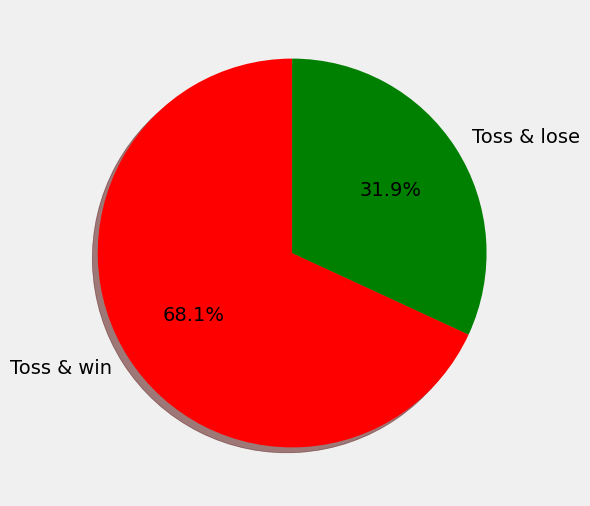

In [99]:
plt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
plt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [101]:
# Count  of each team in the 'toss_winner' column
toss_winner_counts = df['toss_winner'].value_counts()

toss_winner_counts_df = toss_winner_counts.reset_index()
toss_winner_counts_df.columns = ['Team', 'Count']

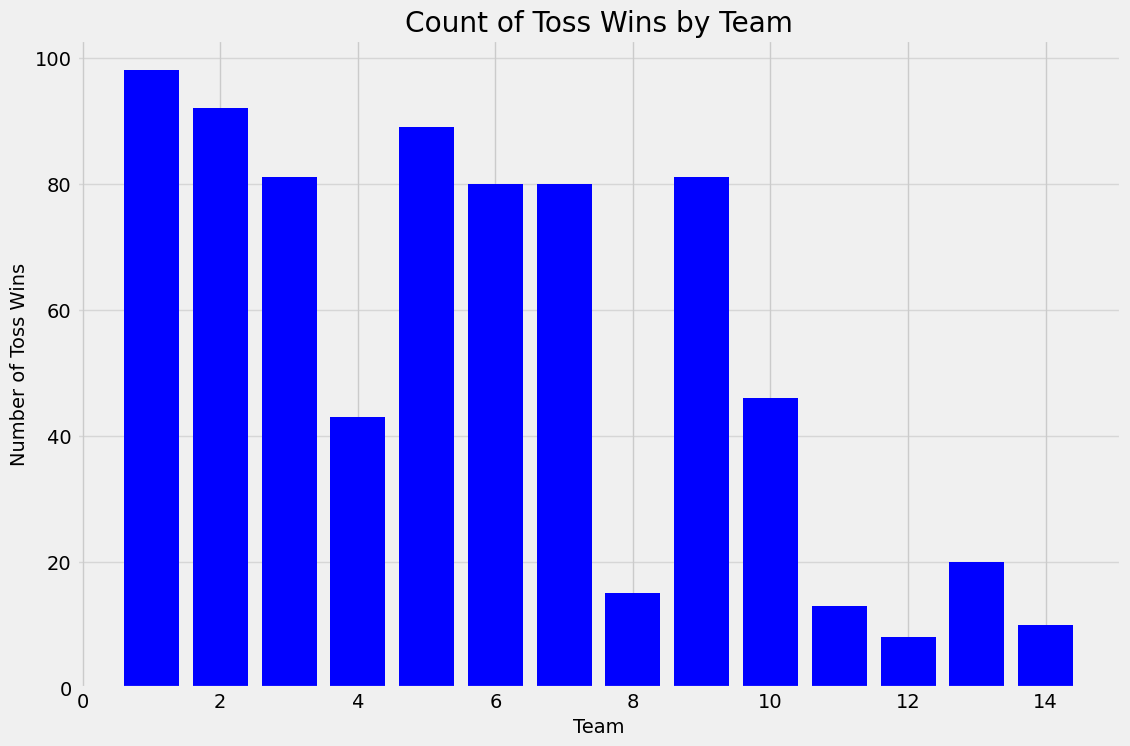

In [103]:
plt.figure(figsize=(12, 8))
plt.bar(toss_winner_counts_df['Team'], toss_winner_counts_df['Count'], color='blue')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.title('Count of Toss Wins by Team')
plt.grid(axis='y', alpha=0.7)
plt.show()


In [104]:
# Count of each team in the 'match_winner' column
match_winner_counts = df['winner'].value_counts()

match_winner_counts_df = match_winner_counts.reset_index()
match_winner_counts_df.columns = ['Team', 'Count']

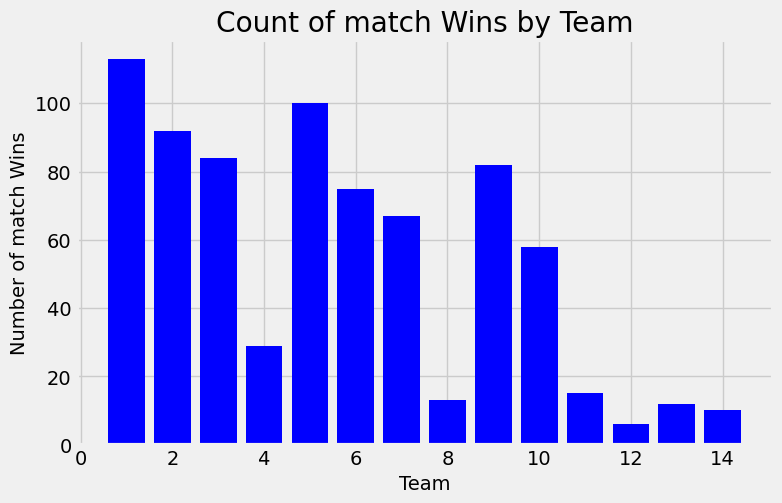

In [107]:
plt.figure(figsize=(8, 5))
plt.bar(match_winner_counts_df['Team'], match_winner_counts_df['Count'], color='blue')
plt.xlabel('Team')
plt.ylabel('Number of match Wins')
plt.title('Count of match Wins by Team')

plt.show()


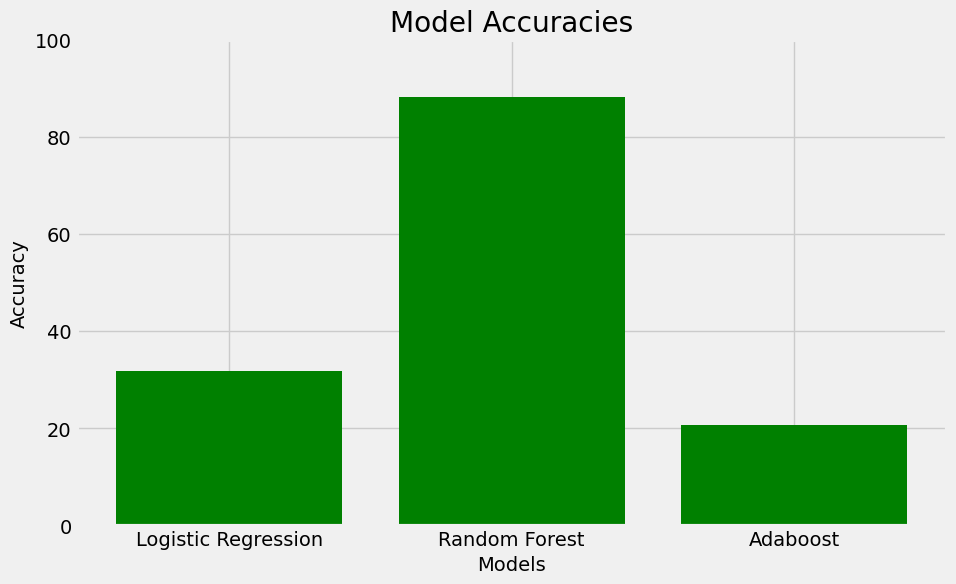

In [109]:
# Model accuracy
model_names = ['Logistic Regression', 'Random Forest', 'Adaboost']
accuracies = [31.74, 88.09, 20.76]  # Replace with your actual accuracies

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['green', 'green', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 100) 
plt.show()